In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [2]:
# import the CSV file
data = pd.read_csv("lyrics_sentiments-forlyrics.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266557 entries, 0 to 266556
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  266557 non-null  int64 
 1   index       266557 non-null  int64 
 2   song        266556 non-null  object
 3   year        266557 non-null  int64 
 4   artist      266557 non-null  object
 5   genre       266557 non-null  object
 6   lyrics      266557 non-null  object
 7   sentiment   266557 non-null  object
dtypes: int64(3), object(5)
memory usage: 16.3+ MB


In [4]:
data.tail()

,Unnamed: 0,index,song,year,artist,genre,lyrics,sentiment
266552,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ...",Negative
266553,362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring\nYou made m...,Negative
266554,362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...,Negative
266555,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...,Negative
266556,362236,362236,amen,2012,edens-edge,Country,I heard from a friend of a friend of a friend ...,Negative


In [5]:
data.describe()

,Unnamed: 0,index,year
count,266557.000000,266557.000000,266557.000000
mean,181938.454848,181938.454848,2007.654914
std,104125.577982,104125.577982,10.115230
min,0.000000,0.000000,67.000000
25%,92456.000000,92456.000000,2006.000000
50%,182106.000000,182106.000000,2007.000000
75%,272055.000000,272055.000000,2010.000000
max,362236.000000,362236.000000,2016.000000


In [6]:
data.shape

(266557, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266557 entries, 0 to 266556
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  266557 non-null  int64 
 1   index       266557 non-null  int64 
 2   song        266556 non-null  object
 3   year        266557 non-null  int64 
 4   artist      266557 non-null  object
 5   genre       266557 non-null  object
 6   lyrics      266557 non-null  object
 7   sentiment   266557 non-null  object
dtypes: int64(3), object(5)
memory usage: 16.3+ MB


In [8]:
data.nunique()

Unnamed: 0    266557
index         266557
song          187186
year              51
artist         14543
genre             12
lyrics        244873
sentiment          2
dtype: int64

In [9]:
#Creating a copy to store cleaned data in a new variable
data.head()
data_cleaned = data.copy(deep=True)

In [10]:
#Drop irrelevant rows with insufficient/wrong info in respective columns

# First column is just row index which is unnamed and not necessary. Therefore, it is removed.
data_cleaned.drop(columns=data_cleaned.columns[0], axis=1, inplace=True)
data_cleaned.columns
data_cleaned.head() 

,index,song,year,artist,genre,lyrics,sentiment
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",Positive
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",Negative
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,Positive
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Negative
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",Negative


In [11]:
# Index column is just row index which is not necessary. Therefore, it is removed.
data_cleaned.drop(columns=data_cleaned.columns[0], axis=1, inplace=True)
data_cleaned.columns
data_cleaned.head() 

,song,year,artist,genre,lyrics,sentiment
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",Positive
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",Negative
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,Positive
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Negative
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",Negative


In [12]:
data_cleaned.head()

,song,year,artist,genre,lyrics,sentiment
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",Positive
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",Negative
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,Positive
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Negative
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",Negative


In [13]:
data_cleaned.isna().sum()

song         1
year         0
artist       0
genre        0
lyrics       0
sentiment    0
dtype: int64

In [14]:
data_cleaned = data_cleaned.dropna()
data_cleaned.isna().sum()

song         0
year         0
artist       0
genre        0
lyrics       0
sentiment    0
dtype: int64

In [15]:
# Create colloumn Count the length of the lyrics column
data_cleaned['Length of Lyrics'] = data_cleaned['lyrics'].str.len()

data_cleaned.head()

,song,year,artist,genre,lyrics,sentiment,Length of Lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",Positive,1961
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",Negative,1270
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,Positive,827
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Negative,2344
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",Negative,1540


In [16]:
# Create new column - Period
data_cleaned['year'] = data_cleaned['year'].astype(int)
def map_to_period(year):
    if 1970 <= year < 1980:
        return "1970s"
    elif 1980 <= year < 1990:
        return "1980s"
    elif 1990 <= year < 2000:
        return "1990s"
    elif 2000 <= year < 2010:
        return "2000s"
    elif year >= 2010:
        return "2010s"
    else:
        return None
data_cleaned['Period'] = data_cleaned['year'].map(map_to_period)
data_cleaned.head()

,song,year,artist,genre,lyrics,sentiment,Length of Lyrics,Period
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",Positive,1961,2000s
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",Negative,1270,2000s
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,Positive,827,2000s
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Negative,2344,2000s
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",Negative,1540,2000s


In [17]:
data_cleaned['Period'].value_counts()

Period
2000s    179641
2010s     75750
1990s      7409
1980s      1917
1970s      1832
Name: count, dtype: int64

In [18]:
data_cleaned.head()

,song,year,artist,genre,lyrics,sentiment,Length of Lyrics,Period
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",Positive,1961,2000s
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",Negative,1270,2000s
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,Positive,827,2000s
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Negative,2344,2000s
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",Negative,1540,2000s


In [19]:
# rename all column for a clean looks
data_cleaned = data_cleaned.rename(columns={"song": "Song",'year': 'Year','artist':'Artist','genre':'Genre','sentiment':'Sentiment','lyrics':'Lyrics','word_count':'Word count'})

In [20]:
data_cleaned.shape

(266556, 8)

In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266556 entries, 0 to 266556
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Song              266556 non-null  object
 1   Year              266556 non-null  int64 
 2   Artist            266556 non-null  object
 3   Genre             266556 non-null  object
 4   Lyrics            266556 non-null  object
 5   Sentiment         266556 non-null  object
 6   Length of Lyrics  266556 non-null  int64 
 7   Period            266549 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.3+ MB


In [22]:
data_cleaned.describe()

,Year,Length of Lyrics
count,266556.000000,266556.000000
mean,2007.654909,1146.469785
std,10.115249,800.034632
min,67.000000,1.000000
25%,2006.000000,658.000000
50%,2007.000000,967.000000
75%,2010.000000,1398.000000
max,2016.000000,42132.000000


In [23]:
data_cleaned.nunique()

Song                187186
Year                    51
Artist               14543
Genre                   12
Lyrics              244873
Sentiment                2
Length of Lyrics      5333
Period                   5
dtype: int64

Sentiment
Negative    152316
Positive    114240
Name: count, dtype: int64


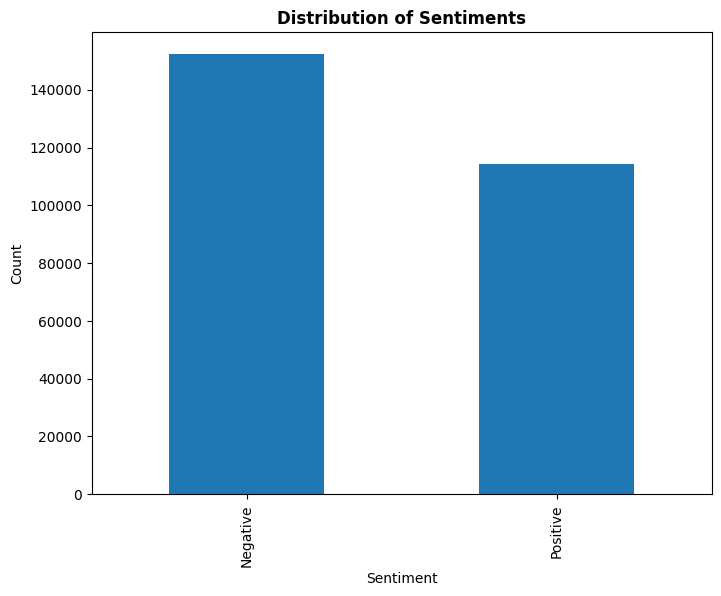

In [24]:
#Exploring the distribution of the target variable (sentiment):
# Count the occurrences of each sentiment category
print(data_cleaned['Sentiment'].value_counts())

# Visualize the distribution using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
data_cleaned['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments',fontweight='bold')
plt.show()

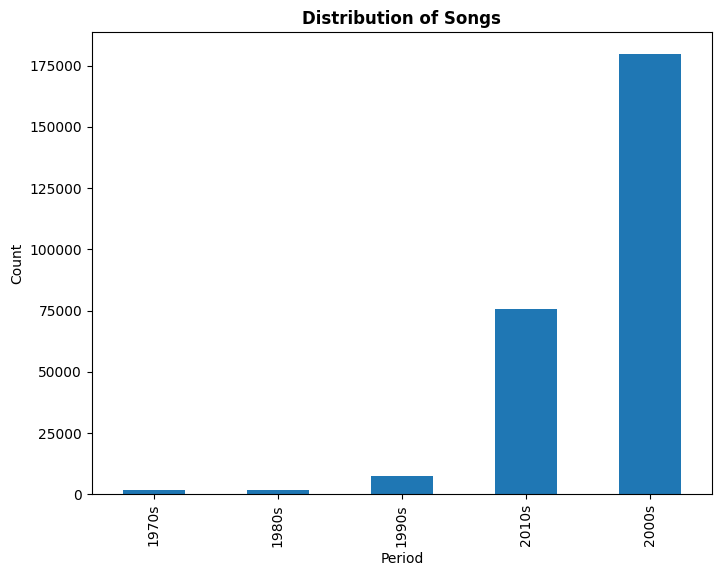

In [63]:
plt.figure(figsize=(8, 6))
data_cleaned['Period'].value_counts().plot(kind='bar')
plt.xlabel('Period')
plt.ylabel('Count')
plt.title('Distribution of Songs',fontweight='bold')

plt.gca().invert_xaxis()
plt.show()

In [26]:
#Analyzing the relationships between variables:
# Check the unique values and their counts for categorical variables
print(data_cleaned['Artist'].value_counts())
print(data_cleaned['Genre'].value_counts())

Artist
dolly-parton             744
elton-john               676
chris-brown              628
barbra-streisand         607
bob-dylan                596
                        ... 
chelsea-schlais            1
avestra                    1
ajack                      1
genomizer                  1
escaping-from-reality      1
Name: count, Length: 14543, dtype: int64
Genre
Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: count, dtype: int64


In [27]:
# Explore the relationship of sentiment with other variables
sentiment_by_artist = data_cleaned.groupby('Artist')['Sentiment'].value_counts()
print(sentiment_by_artist)

sentiment_by_genre = data_cleaned.groupby('Genre')['Sentiment'].value_counts()
print(sentiment_by_genre)

Artist                       Sentiment
009-sound-system             Positive     3
                             Negative     1
047                          Positive     1
0510                         Negative     1
0510-ent                     Positive     1
                                         ..
the-grates                   Negative     2
the-graveyard-boulevard      Negative     6
                             Positive     4
the-great-flood-catastrophe  Positive     1
ykforward-russia             Negative     1
Name: count, Length: 23471, dtype: int64
Genre          Sentiment
Country        Negative      7901
               Positive      6486
Electronic     Negative      4293
               Positive      3673
Folk           Negative      1221
               Positive      1022
Hip-Hop        Negative     16235
               Positive      8615
Indie          Negative      1799
               Positive      1350
Jazz           Negative      4445
               Positive      3525
Met

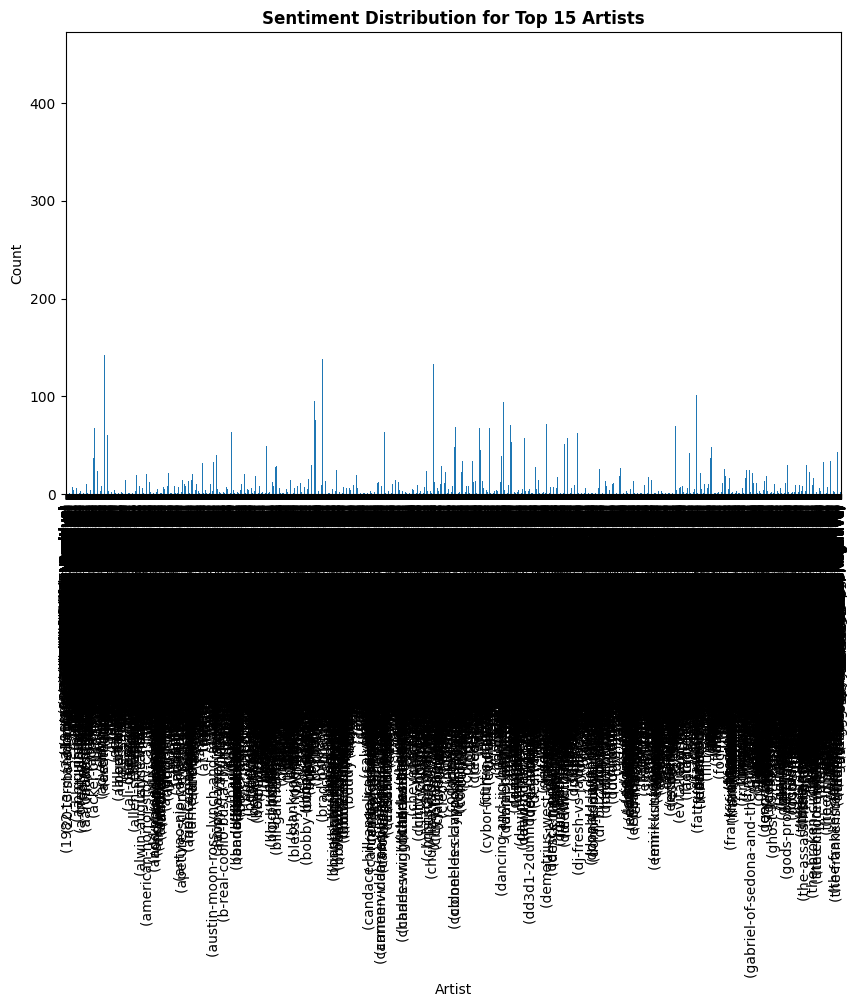

In [28]:
# Visualize the relationships using bar plots or other suitable visualizations
plt.figure(figsize=(10, 6))
sentiment_by_artist.plot(kind='bar')  # Selecting only the top 15 artists
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Top 15 Artists',fontweight='bold')
plt.show()

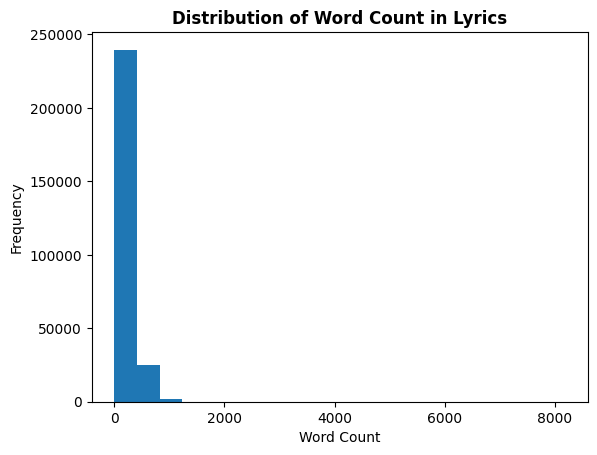

In [29]:
#Text-based analysis of lyrics:
# Analyze the word count distribution in lyrics
data_cleaned['word_count'] = data_cleaned['Lyrics'].apply(lambda x: len(str(x).split()))
plt.hist(data_cleaned['word_count'], bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count in Lyrics',fontweight='bold')
plt.show()

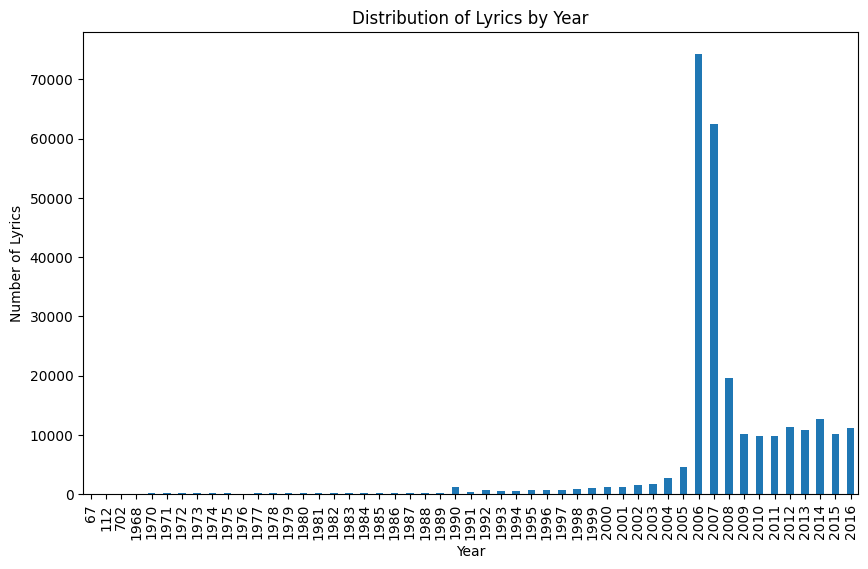

In [30]:
#Analyzing the distribution of lyrics by year:
# Grouping the data by year and counting the number of lyrics per year
lyrics_by_year = data_cleaned.groupby('Year')['Lyrics'].count()

# Plotting the distribution of lyrics by year
plt.figure(figsize=(10, 6))
lyrics_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Lyrics')
plt.title('Distribution of Lyrics by Year',fontweight='bold')
plt.show()

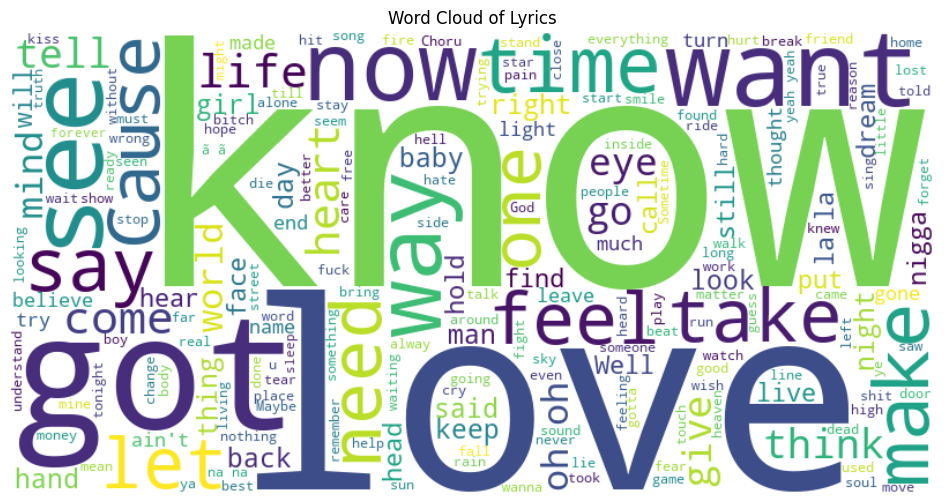

In [31]:
#Exploring the most common words in lyrics:
from wordcloud import WordCloud

# Combining lyrics into a single string
all_lyrics = ' '.join(data_cleaned['Lyrics'].astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()

Genre
Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: count, dtype: int64


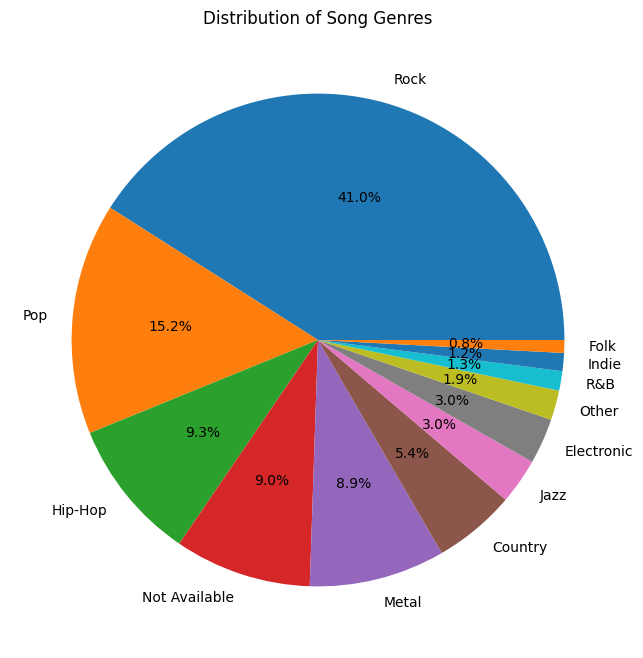

In [32]:
#Analyzing the distribution of song genres:
# Count the occurrences of each genre category
print(data_cleaned['Genre'].value_counts())

# Visualize the distribution using a pie chart
plt.figure(figsize=(8, 8))
data_cleaned['Genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Song Genres')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

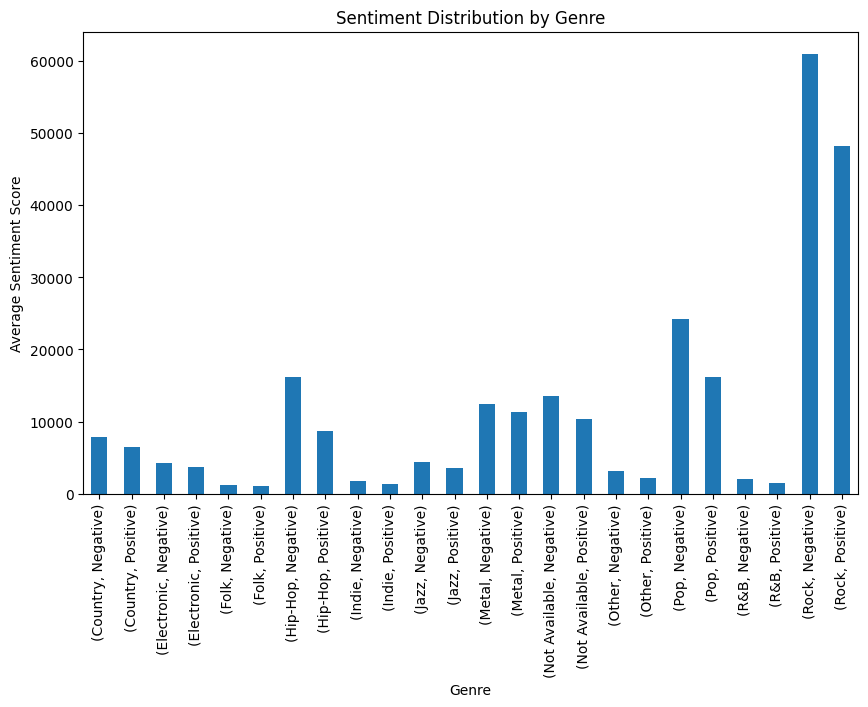

In [33]:
# Visualize the sentiment distribution by genre using a bar plot
plt.figure(figsize=(10, 6))
sentiment_by_genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Distribution by Genre',fontweight='bold')
plt.show

In [34]:
#Word Frequency Analysis:
from collections import Counter

# Combine lyrics into a single string
all_lyrics = ' '.join(data_cleaned['Lyrics'].astype(str))

# Tokenize the lyrics into words
words = all_lyrics.lower().split()

# delete less than 2 char words
words = [words for words in words if len(words) > 3]

# Count the frequency of each word
word_freq = Counter(words)

# Display the most common words
print(word_freq.most_common(10))


[('your', 530795), ('that', 502740), ("don't", 321067), ('with', 317887), ('like', 306582), ('know', 284554), ('this', 284464), ('love', 281432), ('just', 279925), ("it's", 276581)]


In [35]:
import nltk
nltk.download('vader_lexicon')

#Sentiment Analysis using VaderSentiment:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on lyrics
data_cleaned['sentiment_scores'] = data_cleaned['Lyrics'].apply(lambda x: sid.polarity_scores(str(x)))

# Extract the compound sentiment score
data_cleaned['Sentiment'] = data_cleaned['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] >= 0 else 'negative')

# Count the occurrences of each sentiment category
print(data_cleaned['Sentiment'].value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vyduong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment
positive    160290
negative    106266
Name: count, dtype: int64


In [36]:
#Topic Modeling using Latent Dirichlet Allocation (LDA):
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Tokenize the lyrics into words
lyrics_tokens = [lyrics.lower().split() for lyrics in data_cleaned['Lyrics'].astype(str)]

# Create a dictionary from the lyrics tokens
dictionary = Dictionary(lyrics_tokens)

# Create a bag of words representation of the lyrics
corpus = [dictionary.doc2bow(tokens) for tokens in lyrics_tokens]

# Train the LDA model
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the most significant topics
for topic_num in range(num_topics):
    words = lda_model.show_topic(topic_num, topn=10)
    topic_words = ', '.join([word for word, _ in words])
    print(f'Topic {topic_num + 1}: {topic_words}')

Topic 1: the, a, i, and, you, to, it, my, on, in
Topic 2: la, na, da, u, ah, i, doo, la,, di, dem
Topic 3: the, and, of, a, in, to, is, my, we, your
Topic 4: you, i, to, me, and, the, my, it, your, a
Topic 5: que, de, la, no, a, me, ich, y, te, tu


## Lyrics analysis

In [37]:
lyric_data = data_cleaned.copy(deep=True)

In [38]:
lyric_data.head()

,Song,Year,Artist,Genre,Lyrics,Sentiment,Length of Lyrics,Period,word_count,sentiment_scores
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",positive,1961,2000s,433,"{'neg': 0.08, 'neu': 0.683, 'pos': 0.237, 'com..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",positive,1270,2000s,258,"{'neg': 0.077, 'neu': 0.766, 'pos': 0.158, 'co..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,positive,827,2000s,170,"{'neg': 0.109, 'neu': 0.661, 'pos': 0.229, 'co..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",positive,2344,2000s,522,"{'neg': 0.022, 'neu': 0.726, 'pos': 0.251, 'co..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",positive,1540,2000s,312,"{'neg': 0.041, 'neu': 0.879, 'pos': 0.08, 'com..."


In [39]:
the_1970 = lyric_data[lyric_data['Period'] == '1970s']
the_1980 = lyric_data[lyric_data['Period'] == '1980s']
the_1990 = lyric_data[lyric_data['Period'] == '1990s']
the_2000 = lyric_data[lyric_data['Period'] == '2000s']
the_2010 = lyric_data[lyric_data['Period'] == '2010s']

In [69]:
# define word count function
def word_count(the_year,year):
    all_lyrics = ' '.join(the_year['Lyrics'].astype(str))
    words = all_lyrics.lower().split()
    words = [words for words in words if len(words) > 3]
    word_freq = Counter(words)
    print("Some favourite words of {} is:".format(year) ,word_freq.most_common(10))

word_count(the_1970,'The 1970s')
word_count(the_1980,'The 1980s')
word_count(the_1990,'The 1990s')
word_count(the_2000,'The 2000s')
word_count(the_2010,'The 2010s')

Some favourite words of The 1970s is: [('your', 3047), ('that', 2729), ('love', 2479), ("don't", 2268), ('know', 1740), ('just', 1720), ('with', 1567), ("it's", 1538), ('when', 1510), ('what', 1349)]
Some favourite words of The 1980s is: [('your', 3282), ('that', 2873), ('love', 2568), ("don't", 1917), ('with', 1864), ("it's", 1771), ('know', 1653), ('just', 1637), ('when', 1621), ('like', 1509)]
Some favourite words of The 1990s is: [('your', 13618), ('that', 12802), ('love', 9050), ("don't", 8596), ('with', 7938), ('know', 7444), ("it's", 7243), ('just', 7118), ('like', 6989), ('when', 6687)]
Some favourite words of The 2000s is: [('your', 345473), ('that', 320481), ('with', 206989), ("don't", 203876), ('like', 187715), ("it's", 181808), ('this', 181686), ('know', 179129), ('just', 177009), ('love', 176553)]
Some favourite words of The 2010s is: [('your', 165353), ('that', 163829), ('like', 109036), ("don't", 104396), ('with', 99505), ('know', 94574), ('this', 94108), ('just', 92440)

In [47]:
# length of lyrics over decades
mean_length = lyric_data.groupby('Period',as_index=False)['Length of Lyrics'].mean()
mean_length

,Period,Length of Lyrics
0,1970s,952.156659
1,1980s,952.956182
2,1990s,1066.539074
3,2000s,1093.877756
4,2010s,1288.569888


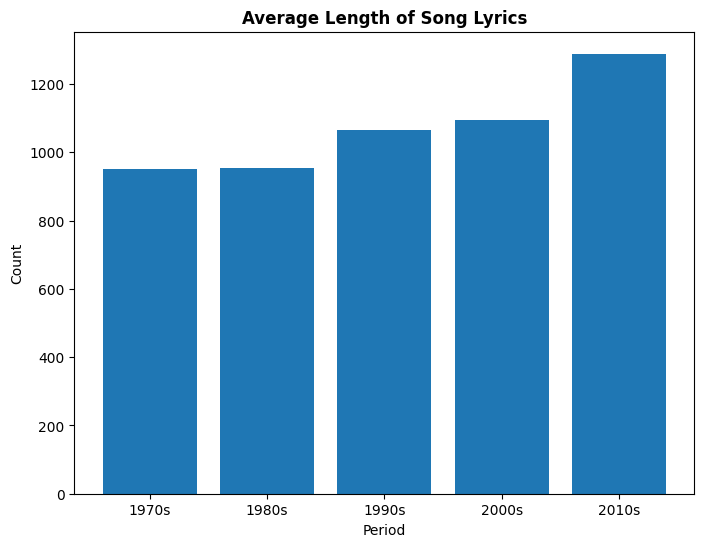

In [48]:
plt.figure(figsize=(8, 6))
plt.bar(data=mean_length,x='Period',height='Length of Lyrics')
plt.xlabel('Period')
plt.ylabel('Count')
plt.title('Average Length of Song Lyrics',fontweight='bold')
plt.show()

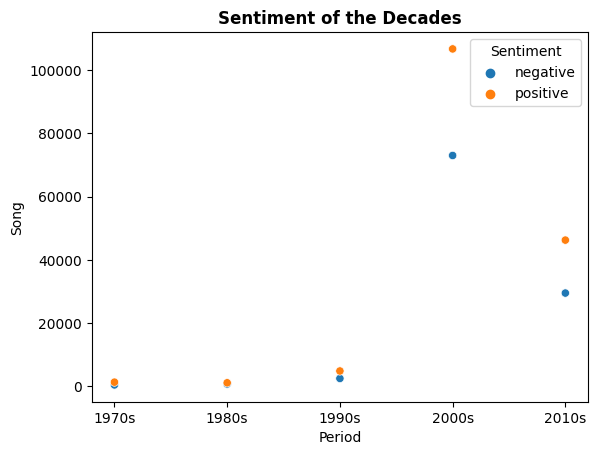

In [70]:
sns.scatterplot(data=sentiment_data,x='Period',y='Song',hue='Sentiment')
plt.title('Sentiment of the Decades',fontweight='bold')
plt.show()

In [41]:
lyrics_1970 = ' '.join(the_1970['Lyrics'].astype(str))
lyrics_1980 = ' '.join(the_1980['Lyrics'].astype(str))
lyrics_1990 = ' '.join(the_1990['Lyrics'].astype(str))
lyrics_2000 = ' '.join(the_2000['Lyrics'].astype(str))
lyrics_2010 = ' '.join(the_2010['Lyrics'].astype(str))

# define wordcloud visual function
def wordcloud(data,year):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of {}'.format(year))
    plt.show()

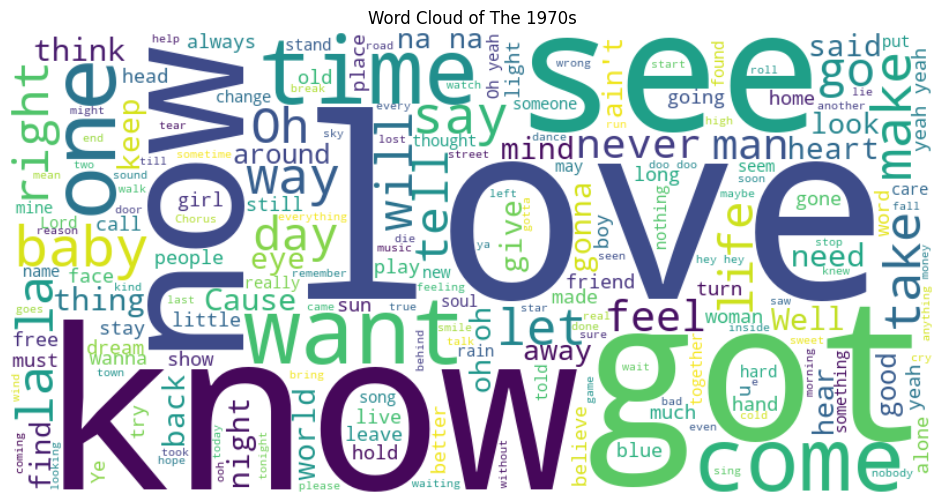

In [42]:
wordcloud(lyrics_1970,'The 1970s')

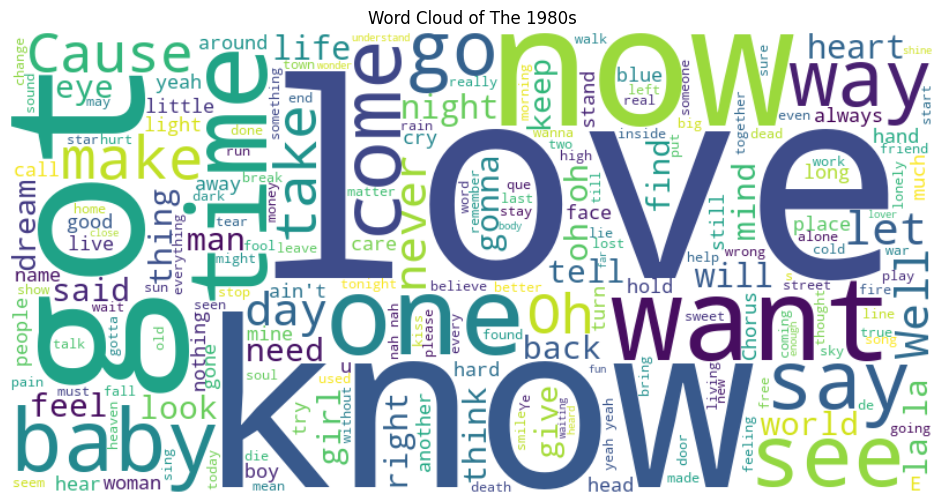

In [43]:
wordcloud(lyrics_1980,'The 1980s')

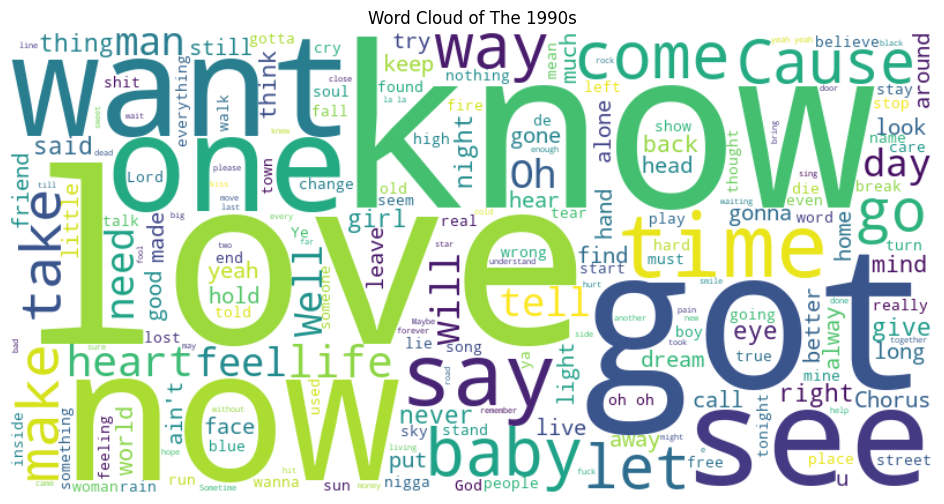

In [44]:
wordcloud(lyrics_1990,'The 1990s')

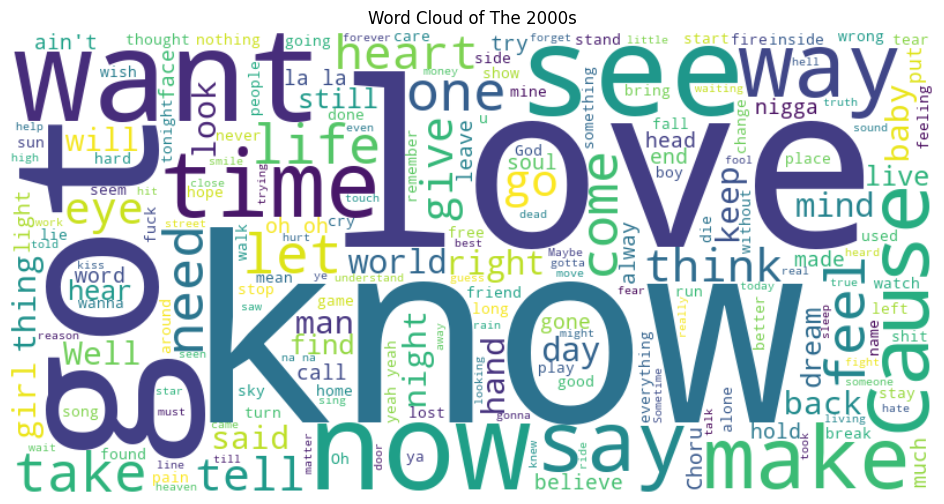

In [45]:
wordcloud(lyrics_2000,'The 2000s')

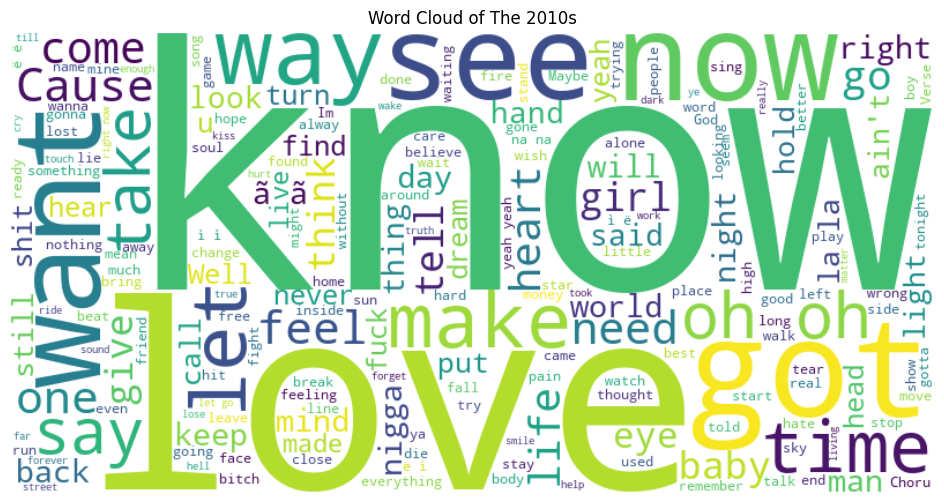

In [46]:
wordcloud(lyrics_2010,'The 2010s')

In [68]:
# genre of songs over decades

genre_data = lyric_data.groupby(['Period','Genre'],as_index=False)['Song'].count().sort_values(['Period','Song'],ascending=False)
genre_data

,Period,Genre,Song
53,2010s,Rock,20949
51,2010s,Pop,14423
45,2010s,Hip-Hop,10011
49,2010s,Not Available,8657
50,2010s,Other,4887
48,2010s,Metal,3939
43,2010s,Electronic,3437
47,2010s,Jazz,2976
42,2010s,Country,2825
46,2010s,Indie,1833


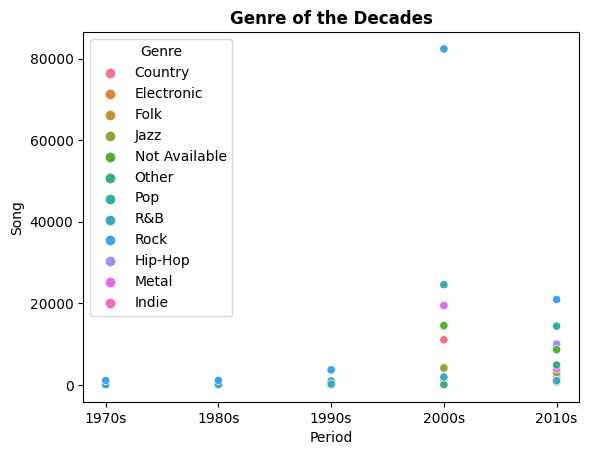

In [50]:
sns.scatterplot(data=genre_data,x='Period',y='Song',hue='Genre')
plt.title('Genre of the Decades',fontweight='bold')
plt.show()

In [51]:
# sentiment of songs over decades
sentiment_data = lyric_data.groupby(['Period','Sentiment'],as_index=False)['Song'].count()
sentiment_data

,Period,Sentiment,Song
0,1970s,negative,478
1,1970s,positive,1354
2,1980s,negative,767
3,1980s,positive,1150
4,1990s,negative,2527
5,1990s,positive,4882
6,2000s,negative,72984
7,2000s,positive,106657
8,2010s,negative,29507
9,2010s,positive,46243


In [53]:
order_by_song_number = data_cleaned.copy(deep=True)
top_15_artist = order_by_song_number.groupby(['Artist','Sentiment'],as_index=False)['Song'].count().sort_values('Song',ascending=False)
top_15_artist.head(15)

,Artist,Sentiment,Song
15398,dolly-parton,positive,579
5166,barbra-streisand,positive,498
13884,dean-martin,positive,490
17172,elton-john,positive,477
16544,eddy-arnold,positive,467
17088,ella-fitzgerald,positive,460
2416,american-idol,positive,452
17365,eminem,negative,438
5364,beach-boys,positive,432
5524,bee-gees,positive,430
